# MANUELA CASTILLA RUSSO CORREA
Para o projeto de ciência dos dados, foram escolhidos alguns fatores e verificar se estes tem uma relação com o Índice de Desenvolvimento Humano. Assim, foram escolhidos os seguintes fatores socioeconômicos:

(1)Mulheres empregadas entre a idade de 15-24. 

(2)A relação de meninas para homens na educação (fundamental 1 e 2) para relacionar com o Índice de Desenvolvimento Humano.

Diante destes elementos, me questonei se: 

#### A quantidade de mulheres que tiveram educação influência no número destas que têm emprego, influenciando assim o IDH do país?


Para responder esta pergunta, ou seja chegar em uma conclusão, foi necessário realizar análises exploratórias.
Para isso, mostrarei os passos para cada código feito e suas análises.

## PASSO 1: JUNTANDO AS TABELAS COM OS FATORES  NO ANO A SER ESTUDADO: 2007

Note que, foi escolhido o ano 2007 para analisar mais profundamente já que este era um dos anos em que tinha mais dados dos três fatores de vários países. 

Sem contar que, foi escolhido, pois é um ano distante da qual estamos hoje em dia, sendo possível analisar melhor e relacionar com seu contexto histórico.

In [1]:
#Primeiramente importamos para poder realizar o código
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#baixando todos os excels
idh = pd.read_excel('hdi_human_development_index.xlsx')
gender_edu = pd.read_excel("ratio_of_girls_to_boys_in_primary_and_secondary_education_perc.xlsx")
employment = pd.read_excel("females_aged_15_24_employment_rate_percent.xlsx")

###### 1. Ao baixar os documentos, selecionei o ano que queria analisar, o ano de 2007:

In [3]:
#pegando as partes que você quer
idh_07 = idh.loc[:,["geo",2007]]
gender_edu_07 = gender_edu.loc[:,["geo",2007]]
employment_07 = employment.loc[:,["geo",2007]]

###### 2. Para analisar mais facilmente os dados, juntei os dados em só um dataframe Para isso, ajustei os index em comum de cada tabela para que os países se "colidissem".

In [4]:
#ajustando o index
idh_idx = idh_07.set_index("geo")
gender_edu_idx = gender_edu_07.set_index("geo")
employment_idx = employment_07.set_index("geo")

In [5]:
idh_idx = idh_idx.rename(index = str, columns = lambda column: "IDH in 2007")
gender_edu_idx = gender_edu_idx.rename(index = str, columns = lambda column: "Gender_edu in 2007" )
employment_idx = index = employment_idx.rename(str, columns = lambda column: "gender_employ in 2007")

###### 3. Assim, iniciei o processo de join (juntar os dados):

In [6]:
#join 1.0
idh_gender = idh_idx.join(gender_edu_idx, how="inner", lsuffix="_idh", rsuffix="_gender")

In [7]:
#join 2.0
data = idh_gender.join(employment_idx, how="inner", lsuffix="_idh", rsuffix="_WomanEmployment")

In [8]:
data.head(2)

,IDH in 2007,Gender_edu in 2007,gender_employ in 2007
geo,,,
Afghanistan,0.433,0.570,28.5
Albania,0.713,0.982,31.0


###### 4. Por fim, eu salvei essa nova tabela em um dataframe

In [9]:
data.to_csv("APS1: junção do employment, gender, idh de 2007.csv")
data.to_excel("APS1: junção do employment, gender, idh de 2007.xlsx")

## PASSO 2: Criando os gráficos e Análise

###### 1. Primeiramente fizemos o comando de correlação, para ver quanto cada fator se relaciona:

In [48]:
data.corr()

,IDH in 2007,Gender_edu in 2007,gender_employ in 2007
IDH in 2007,1.000000,0.638911,-0.280788
Gender_edu in 2007,0.638911,1.000000,-0.186184
gender_employ in 2007,-0.280788,-0.186184,1.000000


#### A partir desta tabela, foi possível já ter uma ideia quanto cada fator influencia o outro. 
Lembrando que, se a correlação resulta 1 ou - 1, quer dizer que existe uma relação forte entre os fatores. Assim, quanto mais perto a 0, menos relacionados entre si são.

###### 2. Colocamos essa correlação, diante de um gráfico com a sua reta de tendência

Para isso, foi usado o seguinte código feito pelo nosso professor:

In [49]:
def reta(data_x, data_y):    
    a = data_y.cov(data_x) / data_x.var()
    b = data_y.mean() - a*data_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(data_x, data_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('IDH em 2007')
    plt.ylabel('employment 2007')

    plt.plot((data_x.min(), data_x.max()), (a*data_x.min()+b, a*data_x.max()+b), color='blue')

    plt.tight_layout()


### IDH em 2007 x mulheres empregadas no total em 2007

Ajuste linear entre X3 e X4:
Coeficiente linear: 53.90476855718466
Coeficiente angular: -27.762687739588912


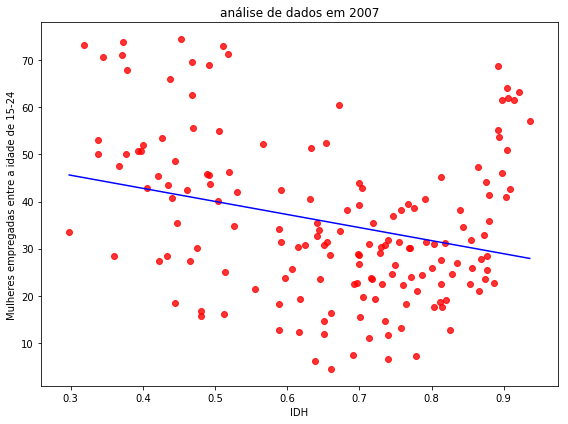

In [50]:
reta( data["IDH in 2007"],data["gender_employ in 2007"])
plt.title('análise de dados em 2007')
plt.xlabel('IDH')
plt.ylabel('Mulheres empregadas entre a idade de 15-24')
plt.show()

Nesse gráfico, relacionando o IDH com o número de mulheres empregadas, podemos ver que existe uma relação mínima (-0.28).

Assim, podemos observar diante do gráfico acima de que não importa a quantidade de mulher empregada, não existe uma relação clara com o IDH, e pode até se dizer que não existe uma relação, ou seja, os dois fatores não são proporcionais entre si.

### IDH em 2007 x quantidade que mulheres tiveram educação

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.7530423721997657
Coeficiente angular: 0.32528255129050754


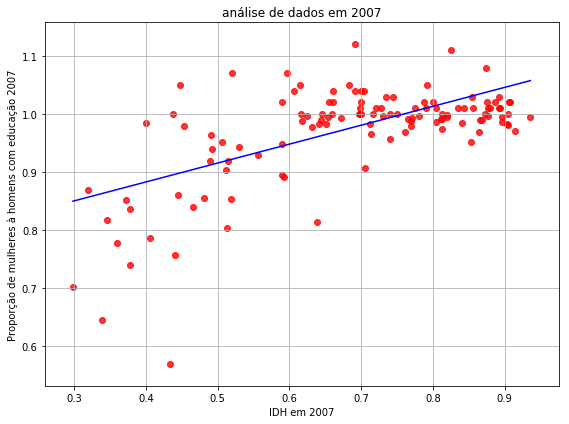

In [13]:
reta( data["IDH in 2007"],data["Gender_edu in 2007"] )
plt.title('análise de dados em 2007')
plt.xlabel('IDH em 2007')
plt.ylabel('Proporção de mulheres à homens com educação 2007')
plt.grid(True)
plt.show()

In [51]:
data[(data["Gender_edu in 2007"]<0.8)&(data["IDH in 2007"]<0.5)]

,IDH in 2007,Gender_edu in 2007,gender_employ in 2007
geo,,,
Afghanistan,0.433,0.570,28.5
Chad,0.338,0.646,53.1
"Congo, Dem. Rep.",0.377,0.740,50.1
Eritrea,0.406,0.787,42.9
Mali,0.360,0.778,28.4
Niger,0.298,0.702,33.5
Togo,0.441,0.757,40.8


Ao contrário do primeiro gráfico, existe uma relação clara entre o IDH dos países com a quantidade de mulheres que tiveram uma educação (0.64). 

Porém, podemos ver que existem alguns pontos abaixo da reta que está muito fora do padrão. Assim, realizei um código para ver quais países seriam estes que estão "fora da curva" e o por quê.

O primeiro país a ser analisado é Afeganistão, um lugar retrógado ao se falar de educação, principalmente quando se retrata de meninas. Durante 1996 a 2001, quando o país estava sobre controle talibã, era proíbido a educação para as mulheres. Hoje em dia, apesar de ter acabado o regime,  ainda existem resquícios e uma grande parte do território ainda é  muito influenciado pelos extremistas. Dado isso, no Afeganistão, de acordo com a ONU: “3,5 milhões de crianças não vão à escola e, dessas, 85% são meninas”.

Além deste, há os demais países nas quais a maioria dos fatores (além da pobreza existente) que fazem com que os valores de educação e IDH são baixos. Estes são: muito casamentos na juventude/ infância (em Chad, 3 de 10 mulheres são casadas antes da idade de 15). 

Ademais, devido a um contexto histórico da mulher sendo submissa, estes países não permitia que estas trabalhassem até pouco tempo atrás.

Por fim, há o fator da educação na qual, além de ser muito baixa para a população como todo, existe um destaque quando se fala das mulheres. Em Mali, por exemplo, apenas 11.3% (2010) das mulherem acima de 25 tiveram "secondary education" (fundamental 1 e início do fundamental 2) - e em Nigéria, apenas 2,5%(2010) tiveram "secondary education"


### Proporção de mulheres à homens com educação x mulheres empregadas no total em 2007

Ajuste linear entre X3 e X4:
Coeficiente linear: 1.0035826825159493
Coeficiente angular: -0.0009827366873368549


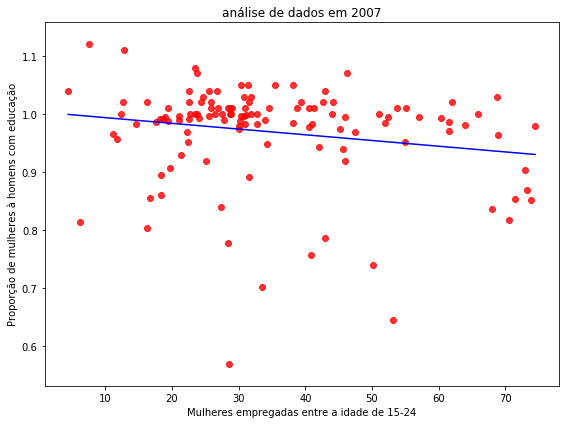

In [15]:
reta( data["gender_employ in 2007"],data["Gender_edu in 2007"] )
plt.title('análise de dados em 2007')
plt.xlabel('Mulheres empregadas entre a idade de 15-24')
plt.ylabel('Proporção de mulheres à homens com educação')
plt.show()

Neste gráfico, apesar na tabela da correlação estar com um valor relativamente baixo, no gráfico de dispersão se aparenta de que os fatores estão mais parecidos. Além disso, vemos que os países que estão mais "fora da curva são:
Apesar da correlação ser pequena, existem alguns pontos mais incomuns que os demais. Estes países são os mesmos do gráfico de cima, como podemos ver na tabela debaixo:

In [52]:
data[(data["Gender_edu in 2007"]<0.8)&(data["gender_employ in 2007"]<55)]

,IDH in 2007,Gender_edu in 2007,gender_employ in 2007
geo,,,
Afghanistan,0.433,0.570,28.5
Chad,0.338,0.646,53.1
"Congo, Dem. Rep.",0.377,0.740,50.1
Eritrea,0.406,0.787,42.9
Mali,0.360,0.778,28.4
Niger,0.298,0.702,33.5
Togo,0.441,0.757,40.8


### Analisar o fator ao longo dos anos (2005 - 2010)

Ao analisar os dados de um ano específico, foi coletado de outros anos para ver se existe uma continuidade nos dados ao longo dos anos.

Para isso, reajustei os indexs novamente:

In [20]:
#ajustando o index
idh_idx1 = idh.set_index("geo")
gender_edu_idx1 = gender_edu.set_index("geo")
employment_idx1 = employment.set_index("geo")

Para poder comparar vários anos, criei uma lista onde vai do ano 2005 até 2011 (porém a lista pega até 2010). Logo após isso, fiz com que meu novo dataframe fosse destes anos escolhidos.

In [21]:
anos = np.arange(2005, 2008)

IDH_cut = idh_idx1.loc[:, anos]
gender_cut = gender_edu_idx1.loc[:, anos]
employment_cut = employment_idx1.loc[:, anos]


In [22]:
idh_r = IDH_cut.rename(index = str, columns = lambda column: "IDH in" + str(column))
gender_edu_r = gender_cut.rename(index = str, columns = lambda column: "Gender_edu in" +str(column) )
employment_r = employment_cut.rename(index = str, columns = lambda column: "gender_employ in " +str(column))

In [23]:
x = idh_r.join(gender_edu_r)
union = x.join(employment_r)


In [24]:
union = union.dropna()

In [53]:
union.corr()

,IDH in2005,IDH in2006,IDH in2007,Gender_edu in2005,Gender_edu in2006,Gender_edu in2007,gender_employ in 2005,gender_employ in 2006,gender_employ in 2007
IDH in2005,1.000000,0.999701,0.999134,0.672643,0.649553,0.646325,-0.202494,-0.186587,-0.182243
IDH in2006,0.999701,1.000000,0.999631,0.674246,0.651185,0.647356,-0.201926,-0.185564,-0.181196
IDH in2007,0.999134,0.999631,1.000000,0.674025,0.650722,0.646113,-0.201033,-0.184657,-0.180157
Gender_edu in2005,0.672643,0.674246,0.674025,1.000000,0.990066,0.966577,-0.245213,-0.238522,-0.238988
Gender_edu in2006,0.649553,0.651185,0.650722,0.990066,1.000000,0.985294,-0.239255,-0.234348,-0.234039
Gender_edu in2007,0.646325,0.647356,0.646113,0.966577,0.985294,1.000000,-0.233449,-0.227371,-0.227722
gender_employ in 2005,-0.202494,-0.201926,-0.201033,-0.245213,-0.239255,-0.233449,1.000000,0.995434,0.992637
gender_employ in 2006,-0.186587,-0.185564,-0.184657,-0.238522,-0.234348,-0.227371,0.995434,1.000000,0.994042
gender_employ in 2007,-0.182243,-0.181196,-0.180157,-0.238988,-0.234039,-0.227722,0.992637,0.994042,1.000000


Assim, reajustei o gráfico dado pelo professor, para que fizesse de cada ano selecionado: 

In [34]:
def dos_anos(ano_inicial, ano_final, nameX, nameY, data, titulo, label_x, label_y):
    lista = np.arange(ano_inicial, ano_final+1)
    fig = plt.figure(figsize=(12,10))
    
    for ano in lista:
        dados_x = data[nameX+ str(ano)]
        dados_y = data[nameY+str(ano)]
        
        a = dados_y.cov(dados_x) / dados_x.var()
        b = dados_y.mean() - a*dados_x.mean()
        
        plt.scatter(dados_x, dados_y, alpha=0.8)
        plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')


    plt.legend()
    plt.title('x versus y')
    plt.xlabel('IDH em 2007')
    plt.ylabel('employment 2007')


    plt.tight_layout()
    plt.show()

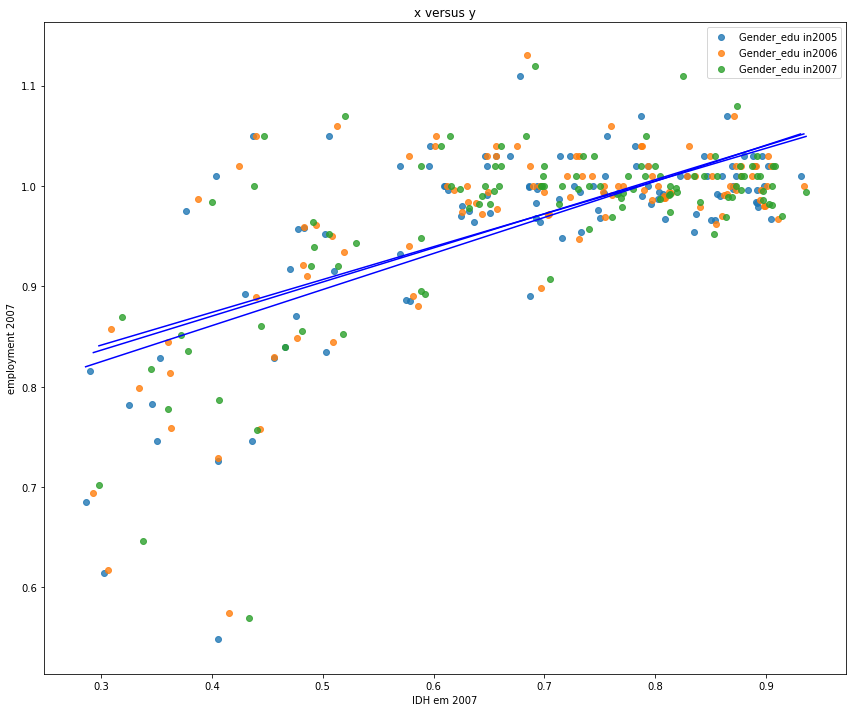

In [35]:
dos_anos(2005, 2007, "IDH in", "Gender_edu in", union, "idh por gender nos anos ", "IDH", "edu gender")

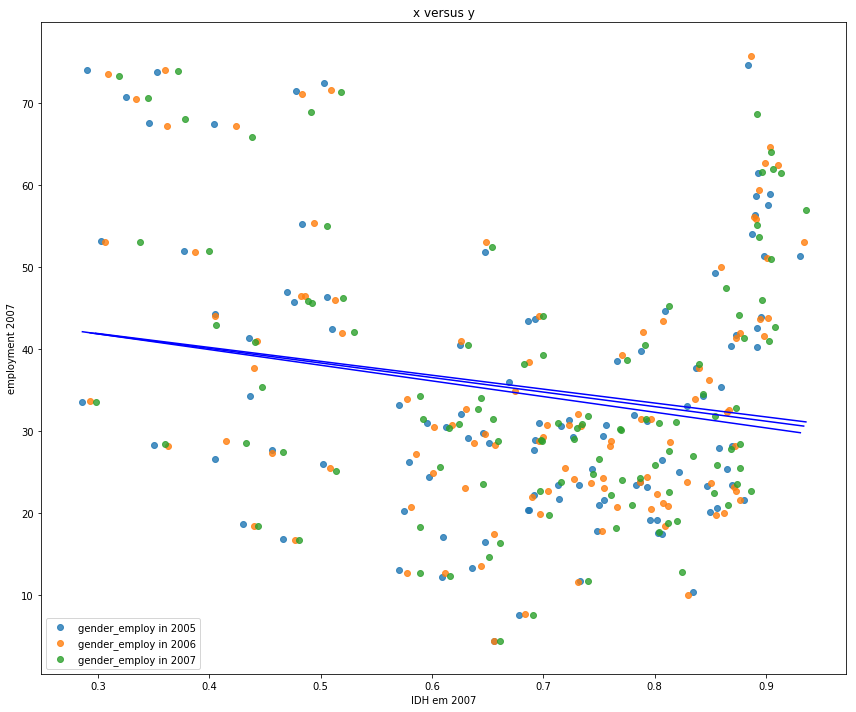

In [36]:
dos_anos(2005, 2007, "IDH in", "gender_employ in ", union, "idh por gender nos anos ", "IDH", "edu gender")

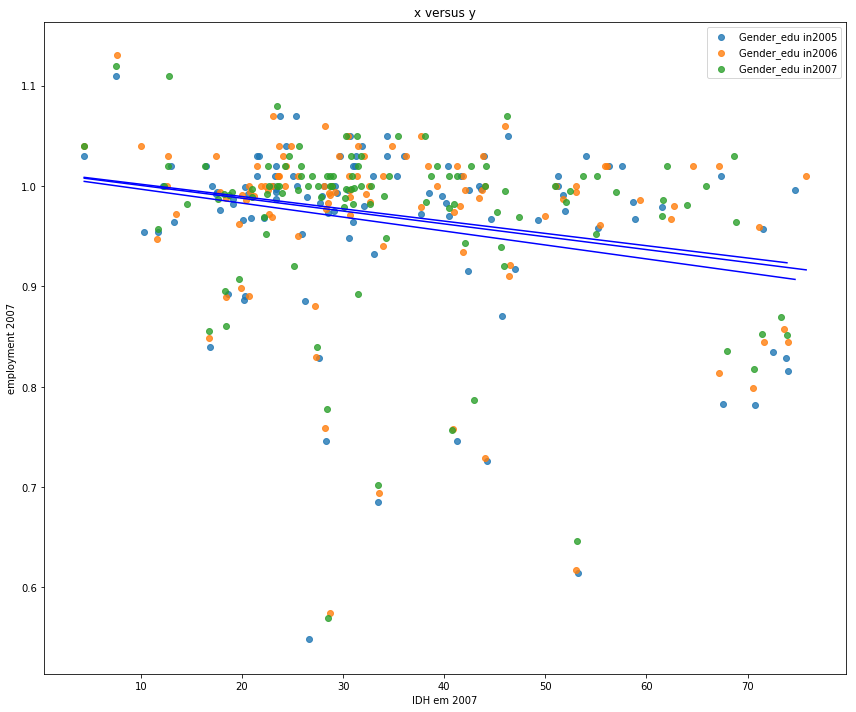

In [37]:
dos_anos(2005, 2007, "gender_employ in ", "Gender_edu in", union, "idh por gender nos anos ", "IDH", "edu gender")

### CONCLUSÃO

Retomando a questão: 
##### A quantidade de mulheres que tiveram educação influência no número destas que têm emprego, influenciando assim o IDH do país?


Diante dos gráficos em que mostram vários anos, podemos ver que são muito similares quando se analisa apenas um ano (2007), chegando às seguinte conclusões: 

(1) Não existe uma relação clara entre IDH com a possibilidade de emprego das mulheres. Ou seja, um fator não influencia o outro. 

(2) Existe uma relação plausível entre a chance de emprego para mulheres com a educação destas. Chegando a conclusão de que estes sim se infuenciam, porém existem outras variáveis nesta "equação". 

(3) Por fim, há uma relação muito clara entre o IDH e a educação para meninas. Totalizando que o fator de educação para meninas influencia o Índice de Desenvolvimento Humano.